# **Tugas 3 (Drag Force)**

**Dhiya Salma Salsabila/24923304**

**Muhammad Nauval Ar-Rauf/10222035**


# **Parasut**

### **1. Definisi Variabel dan Geometri**

Definisi parameter dasar:
* **Waktu:** $t$ dengan langkah waktu simulasi $\Delta t$.
* **Parasut:**
    * Massa: $M$.
    * Kecepatan jatuh (vertikal): $V_p(t)$ (arah positif ke bawah).
    * Bentuk: Busur elips. Persamaan elips di koordinat lokal $(x, y)$ parasut:
        $$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1, \quad y \geq 0$$
        (Asumsi parasut terbuka ke bawah menahan angin).
* **Partikel (Gas/Udara):**
    * Massa per partikel simulasi: $m$.
    * Faktor Skala: $N_r$ (1 partikel simulasi mewakili $N_r$ partikel nyata).
    * Kecepatan partikel ke-$i$: $ v_i = (v_{i,x}, v_{i,y})$.
* **Ruang Visual (Domain):** Persegi panjang dengan batas $x \in [-L, L]$ dan $y \in [-H, H]$. Sistem koordinat ini **bergerak** bersama parasut.

### **2. Persamaan Gerak Parasut (Makroskopis)**

Parasut mengalami gerak jatuh bebas dengan gaya hambat (drag). Hukum II Newton:

$$M \frac{dV_p}{dt} = M g - F_{drag}(t)$$

* $g$: Percepatan gravitasi.
* $F_{drag}(t)$: Gaya total yang dihitung dari akumulasi tumbukan partikel (dihitung secara Monte Carlo).

### **3. Generasi Partikel**

Jika parasut bergerak ke bawah dengan kecepatan $V_p$, maka relatif terhadap parasut, angin partikel bergerak ke atas dengan kecepatan rata-rata $V_p$.

**Distribusi Kecepatan (Isotropic Maxwellian):**
Dalam kerangka diam, kecepatan partikel mengikuti distribusi Maxwell-Boltzmann dengan temperatur $T$:

$$f(v) \propto e^{-\frac{m(v_x^2 + v_y^2)}{2kT}}$$

**Transformasi ke Kerangka Parasut:**
Saat kita mengenerate partikel baru di batas-batas *visual space*, kecepatannya ($\mathbf{v}_{local}$) adalah:
$$\mathbf{v}_{local} = \mathbf{v}_{thermal} + \mathbf{v}_{flow}$$
Dimana $\mathbf{v}_{flow} = (0, V_p)$ (udara terlihat naik relatif terhadap parasut).

**Algoritma Generasi:**
Pada setiap langkah $\Delta t$:
1.  Hitung jumlah partikel yang masuk berdasarkan fluks termal dan kecepatan parasut saat ini.
2.  Bangkitkan posisi acak di sepanjang batas (uniform).
3.  Bangkitkan kecepatan acak menggunakan *Box-Muller transform* untuk komponen termal, lalu tambahkan vektor kecepatan parasut $(0, V_p)$.


### **4. Interaksi Partikel-Parasut**

Ketika partikel menabrak busur elips, terjadi tumbukan elastis sempurna (Poin 6).

**Deteksi Tumbukan:**
Partikel berada di dalam parasut jika:

$\frac{x_i^2}{a^2} + \frac{y_i^2}{b^2} \le 1$

(dan berada di sisi aktif busur).

**Refleksi (Pantulan):**
Jika menabrak titik permukaan dengan vektor normal satuan $\mathbf{n}$, kecepatan baru $\mathbf{v}'$ adalah:

$$\mathbf{v}' = \mathbf{v} - 2(\mathbf{v} \cdot \mathbf{n})\mathbf{n}$$

**Vektor Normal Elips:**
Untuk elips $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$, vektor normal di titik $(x, y)$ adalah:

$$\mathbf{n} = \frac{(\frac{x}{a^2}, \frac{y}{b^2})}{\sqrt{(\frac{x}{a^2})^2 + (\frac{y}{b^2})^2}}$$

### **5. Perhitungan Drag Force**

Gaya adalah laju perubahan momentum. Berdasarkan Poin 7, kita menjumlahkan perubahan momentum semua partikel yang bertumbukan dalam selang waktu $\Delta t$.

$$\mathbf{F}_{drag} \approx \frac{N_r}{\Delta t} \sum_{k \in \text{collisions}} m (\mathbf{v}'_k - \mathbf{v}_k)$$

* $\mathbf{v}_k$: Kecepatan sebelum tumbukan.
* $\mathbf{v}'_k$: Kecepatan setelah tumbukan.
* Hanya komponen vertikal ($y$) yang berkontribusi menahan laju jatuh parasut.

### **6. Algoritma Simulasi Langkah-demi-Langkah**

Berikut adalah logika kode (pseudocode) untuk simulasi ini:

1.  **Inisialisasi:**
    * Set $t = 0$, $V_p = 0$ (atau $V_{initial}$), Posisi Parasut $Y = H_{awal}$.
    * Kosongkan list partikel.

2.  **Loop Waktu (selama $t < t_{max}$):**

    * **A. Update Posisi Partikel:**
        * Untuk setiap partikel $i$, update posisi: $\mathbf{r}_i(t+\Delta t) = \mathbf{r}_i(t) + \mathbf{v}_i \Delta t$.
        * Hapus partikel yang keluar dari batas *visual space*.

    * **B. Generasi Partikel Baru (Monte Carlo):**
        * Hitung area batas yang terpapar aliran "angin" (terutama batas bawah karena parasut jatuh).
        * Generate $N_{new}$ partikel di batas tersebut.
        * Assign kecepatan $\mathbf{v}_i \sim \mathcal{N}(0, \sigma) + (0, V_p)$.

    * **C. Deteksi Tumbukan & Hitung Momentum:**
        * Inisialisasi $\Delta P_{total} = 0$.
        * Untuk setiap partikel $i$:
            * Jika menabrak elips:
                1.  Hitung normal $\mathbf{n}$.
                2.  Hitung $\mathbf{v}_{new}$ (refleksi elastis).
                3.  Hitung transfer momentum: $\delta p = m(v_{new, y} - v_{old, y})$.
                4.  Tambahkan ke total: $\Delta P_{total} += \delta p$.
                5.  Update kecepatan partikel ke $\mathbf{v}_{new}$.

    * **D. Update Fisika Parasut:**
        * Hitung Gaya Drag Instan: $F_{drag} = N_r \frac{\Delta P_{total}}{\Delta t}$.
            *(Catatan: Karena tumbukan memantul ke bawah, partikel memberikan gaya ke atas pada parasut. Pastikan tanda positif/negatif sesuai arah sumbu).*
        * Update Kecepatan Parasut (Euler Method):
            $$V_p(t+\Delta t) = V_p(t) + \left( g - \frac{F_{drag}}{M} \right) \Delta t$$

    * **E. Lanjut Langkah Berikutnya:**
        * $t = t + \Delta t$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from matplotlib.patches import Polygon, Circle
from collections import deque

# 1. PARAMETER SIMULASI
num_particles = 600
box_w, box_h = 16, 16
dt = 0.04
steps = 250

# --- Fisika ---
particle_mass = 0.08
fall_speed = 10.0
temp_velocity = 3.0

# --- Geometri Parasut ---
para_width = 6.0
para_height = 3.0
center_x, center_y = 0.0, 3.0
suspension_len = 5.0

drag_history = deque(maxlen=30)

# 2. GAMBAR
def create_canopy_points(cx, cy, a, b, start_angle, end_angle):
    theta = np.linspace(start_angle, end_angle, 30)
    x = cx + a * np.cos(theta)
    y = cy + b * np.sin(theta)
    points = [[xi, yi] for xi, yi in zip(x, y)]
    points.append([cx, cy])
    return np.array(points)

# 3. SETUP VISUALISASI
fig, ax = plt.subplots(figsize=(9, 10))

# Viewport
y_min = -8
y_max = 8
ax.set_xlim(-box_w/2, box_w/2)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')
ax.set_title("Simulasi Pendaratan Parasut", fontsize=14)
ax.set_facecolor('#87CEEB')

# GAMBAR PARASUT
# Kiri (Kuning)
pts_left = create_canopy_points(center_x, center_y, para_width, para_height, np.pi*0.8, np.pi)
poly_left = Polygon(pts_left, closed=True, facecolor='#ADFF2F', edgecolor='orange', lw=1, zorder=4)
ax.add_patch(poly_left)

# Kanan (Kuning)
pts_right = create_canopy_points(center_x, center_y, para_width, para_height, 0, np.pi*0.2)
poly_right = Polygon(pts_right, closed=True, facecolor='#ADFF2F', edgecolor='orange', lw=1, zorder=4)
ax.add_patch(poly_right)

# Tengah (Oranye)
pts_center = create_canopy_points(center_x, center_y, para_width, para_height, np.pi*0.2, np.pi*0.8)
poly_center = Polygon(pts_center, closed=True, facecolor='#FF4500', edgecolor='#8B0000', lw=2, zorder=5)
ax.add_patch(poly_center)

# GAMBAR TALI
pilot_anchor_y = center_y - suspension_len
line_angles = [0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi]
for ang in line_angles:
    lx = center_x + para_width * np.cos(ang)
    ly = center_y + para_height * np.sin(ang)
    ax.plot([lx, center_x], [ly, pilot_anchor_y], color='gray', lw=0.8, alpha=0.7, zorder=3)

# GAMBAR ORANG
# Kepala
head = Circle((center_x, pilot_anchor_y), 0.5, color='black', zorder=6)
ax.add_patch(head)
# Badan
ax.plot([center_x, center_x], [pilot_anchor_y, pilot_anchor_y - 1.5], color='black', lw=4, zorder=6)
# Tangan
ax.plot([center_x, center_x - 0.8], [pilot_anchor_y - 0.5, pilot_anchor_y + 0.5], color='black', lw=3, zorder=6)
ax.plot([center_x, center_x + 0.8], [pilot_anchor_y - 0.5, pilot_anchor_y + 0.5], color='black', lw=3, zorder=6)
# Kaki
ax.plot([center_x, center_x - 0.6], [pilot_anchor_y - 1.5, pilot_anchor_y - 2.8], color='darkblue', lw=3, zorder=6)
ax.plot([center_x, center_x + 0.6], [pilot_anchor_y - 1.5, pilot_anchor_y - 2.8], color='darkblue', lw=3, zorder=6)

# PARTIKEL
particles, = ax.plot([], [], '.', markersize=2, color='white', alpha=0.5, zorder=2)
text_info = ax.text(0.02, 0.85, "", transform=ax.transAxes, fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round'))

# 4. INISIALISASI PARTIKEL
x = np.random.uniform(-box_w/2, box_w/2, num_particles)
y = np.random.uniform(y_min, y_max, num_particles)
vx = np.random.normal(0, temp_velocity, num_particles)
vy = np.random.normal(fall_speed, temp_velocity, num_particles)

# 5. LOOP SIMULASI
writer = PillowWriter(fps=30)
output_file = "parachute.gif"
print("Mulai simulasi...")

total_drag_force_final = 0

with writer.saving(fig, output_file, dpi=100):
    for step in range(steps):
        # Update Posisi
        x += vx * dt
        y += vy * dt

        # Deteksi Tumbukan
        rel_x = x - center_x
        rel_y = y - center_y
        inside = ((rel_x/para_width)**2 + (rel_y/para_height)**2 <= 1.0)
        upper = rel_y > 0
        hit_mask = inside & upper

        frame_drag = 0.0

        if hit_mask.any():
            idx = np.where(hit_mask)[0]
            nx = 2 * rel_x[idx] / (para_width**2)
            ny = 2 * rel_y[idx] / (para_height**2)
            mag = np.sqrt(nx**2 + ny**2)
            nx /= mag
            ny /= mag

            v_dot_n = vx[idx]*nx + vy[idx]*ny
            valid = v_dot_n < 0

            if valid.any():
                real_idx = idx[valid]
                nx_v, ny_v = nx[valid], ny[valid]
                dot_v = v_dot_n[valid]

                vy_old = vy[real_idx].copy()
                vx[real_idx] -= 2 * dot_v * nx_v
                vy[real_idx] -= 2 * dot_v * ny_v

                delta_vy = vy[real_idx] - vy_old
                impulse = -1 * particle_mass * delta_vy
                frame_drag = np.sum(impulse) / dt

                x[real_idx] += nx_v * 0.3
                y[real_idx] += ny_v * 0.3

        drag_history.append(frame_drag)
        avg_drag = np.mean(drag_history) if drag_history else 0
        total_drag_force_final = avg_drag

        # Re-spawn
        out_top = y > y_max
        if out_top.any():
            y[out_top] = y_min
            x[out_top] = np.random.uniform(-box_w/2, box_w/2, out_top.sum())
            vx[out_top] = np.random.normal(0, temp_velocity, out_top.sum())
            vy[out_top] = np.random.normal(fall_speed, temp_velocity, out_top.sum())

        out_side = np.abs(x) > box_w/2
        if out_side.any():
            x[out_side] *= -0.9

        particles.set_data(x, y)
        text_info.set_text(f"Altitude: ~500m\nFall Speed: {fall_speed} m/s\nDRAG FORCE: {avg_drag:.1f} N")

        writer.grab_frame()

plt.close()
print(f"Simulasi selesai. File: {output_file}")

Mulai simulasi...
Simulasi selesai. File: parachute_fixed_legend.gif


# **Analisis lebar parasut terhadap Drag Force**
Dalam fisika, udara memiliki kerapatan yang sama di mana-mana (pada ketinggian yang sama). Tidak peduli apakah kita melihat jendela seluas 1 meter persegi atau 100 meter persegi.

Dalam simulasi Monte Carlo 2D, kepadatan partikel ($\rho$) didefinisikan sebagai:

$$\rho = \frac{N}{A}$$

Dimana:

  * $\rho$ (*rho*): Kepadatan (partikel per $m^2$).
  * $N$: Jumlah total partikel (*Number of particles*).
  * $A$: Luas area kotak simulasi (*Area* = Lebar $\times$ Tinggi).

Jika memperbesar ukuran parasut, tetapi tetap membiarkan partikel ($N$) tetap (misal selalu 500 partikel):

1.  Area $A$ membesar.
2.  Jumlah $N$ tetap.
3.  Maka Kepadatan $\rho$ akan turun drastis.

$$\rho_{baru} = \frac{500}{Area_{besar}} \rightarrow 0 \text{ (Mendekati Vakum)}$$

**Efek pada Drag Force:**
Meskipun parasut menjadi lebih lebar (yang seharusnya menangkap lebih banyak angin), udaranya menjadi sangat tipis.

  * Rumus Drag: $F_d \propto \rho \cdot \text{Lebar}$.
  * Karena $\rho$ turun drastis, maka $F_d$ tidak naik, malah bisa turun atau datar.

Agar simulasi berjalan dengan realistis, kami menetapkan Target Density ($\rho_{target}$) yang konstan.

Misalnya, kita tetapkan $\rho_{target} = 2$ partikel per unit luas.

Maka, rumus untuk mencari jumlah partikel yang dibutuhkan ($N_{baru}$) saat area berubah adalah:

$$N_{baru} = \rho_{target} \times A_{baru}$$

Dimana $A_{baru} = \text{Box Width} \times \text{Box Height}$.


### Contoh Perhitungan Numerik

**Skenario Awal:**

  * Lebar Parasut: 50
  * Ukuran Box: $100 \times 100 = 10.000$ unit luas.
  * Target Densitas: 0.05
  * **Jumlah Partikel ($N$):** $0.05 \times 10.000 = \mathbf{500}$ partikel.

**Skenario Baru (Besar - Lebar 100):**
Parasut diperbesar 2x lipat. Box simulasi juga membesar 2x lipat (panjang dan lebarnya).

  * Lebar Parasut: 100
  * Ukuran Box: $200 \times 200 = 40.000$ unit luas (Area naik 4x lipat\!).

**Jika Menghitung $N$:**
$$N = \rho_{target} \times A_{baru}$$
$$N = 0.05 \times 40.000 = \mathbf{2.000} \text{ partikel}$$

Sedang menghitung rata-rata (Running 5 trials per width)...
Lebar 50: Rata-rata Drag 4.65 N
Lebar 60: Rata-rata Drag 5.34 N
Lebar 70: Rata-rata Drag 5.94 N
Lebar 80: Rata-rata Drag 6.58 N
Lebar 90: Rata-rata Drag 7.02 N
Lebar 100: Rata-rata Drag 7.67 N


/tmp/ipython-input-1246919331.py:133: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


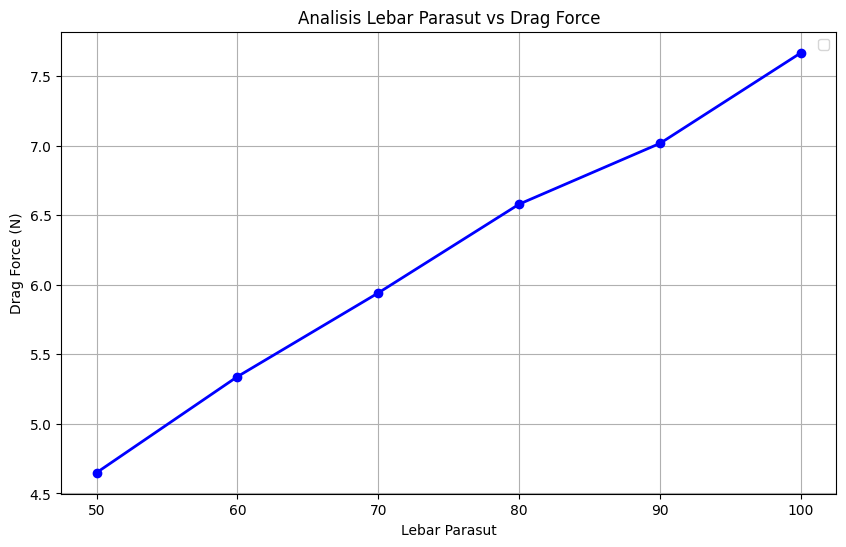

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation_smooth(width_input):
    # 1. SETUP GEOMETRI
    radius_a = width_input / 2.0
    radius_b = radius_a * 0.5

    # Perbesar box mengikuti parasut
    box_w = width_input * 3.0
    box_h = width_input * 2.0

    # 2. KOREKSI DENSITAS
    target_density = 2.0
    area = box_w * box_h

    # Jumlah partikel menyesuaikan luas area agar kepadatan KONSTAN
    num_particles = int(target_density * area)
    max_particles = 8000
    if num_particles > max_particles:
        mass_scaling = num_particles / max_particles
        real_num_particles = max_particles
        real_particle_mass = 0.05 * mass_scaling # Massa diperberat
    else:
        real_num_particles = num_particles
        real_particle_mass = 0.05

    # Parameter Simulasi
    steps = 400
    dt = 0.05
    fall_speed = 10.0
    temp_vel = 3.0

    # Inisialisasi
    x = np.random.uniform(-box_w/2, box_w/2, real_num_particles)
    y = np.random.uniform(-box_h/2, box_h/2, real_num_particles)
    vx = np.random.normal(0, temp_vel, real_num_particles)
    vy = np.random.normal(fall_speed, temp_vel, real_num_particles)

    cx, cy = 0.0, 0.0
    drag_readings = []

    # 3. LOOP SIMULASI
    for step in range(steps):
        x += vx * dt
        y += vy * dt

        # Boundary Reset (Wind Tunnel)
        out_top = y > box_h/2
        if out_top.any():
            c = out_top.sum()
            y[out_top] = -box_h/2
            x[out_top] = np.random.uniform(-box_w/2, box_w/2, c)
            vx[out_top] = np.random.normal(0, temp_vel, c)
            vy[out_top] = np.random.normal(fall_speed, temp_vel, c)

        # Collision
        rel_x = x - cx
        rel_y = y - cy
        inside = ((rel_x/radius_a)**2 + (rel_y/radius_b)**2 <= 1.0)
        hit = inside & (rel_y > 0)

        frame_force = 0.0

        if hit.any():
            idx = np.where(hit)[0]
            nx = 2 * rel_x[idx] / (radius_a**2)
            ny = 2 * rel_y[idx] / (radius_b**2)
            mag = np.sqrt(nx**2 + ny**2)
            nx /= mag
            ny /= mag

            dot = vx[idx]*nx + vy[idx]*ny
            valid = dot < 0

            if valid.any():
                real_idx = idx[valid]
                dot_v = dot[valid]
                nx_v, ny_v = nx[valid], ny[valid]

                vy_old = vy[real_idx].copy()
                vx[real_idx] -= 2 * dot_v * nx_v
                vy[real_idx] -= 2 * dot_v * ny_v

                delta_vy = vy[real_idx] - vy_old
                # Hitung Force
                impulse = -1 * real_particle_mass * delta_vy
                frame_force = np.sum(impulse) / dt

                x[real_idx] += nx_v * 0.2
                y[real_idx] += ny_v * 0.2

        # Simpan data hanya setelah kondisi stabil
        if step > 100:
            drag_readings.append(frame_force)

    # Kembalikan rata-rata dari 300 frame terakhir
    return np.mean(drag_readings)

# --- EKSEKUSI ---
widths = [50, 60, 70, 80, 90, 100]
results = []

print("Sedang menghitung rata-rata...")

for w in widths:
    trials = []
    # JALANKAN 5 KALI PER UKURAN UNTUK MENGHILANGKAN NOISE
    for i in range(5):
        d = run_simulation_smooth(w)
        trials.append(d)

    # Ambil rata-rata dari 5 percobaan
    avg_trial = np.mean(trials)*-1
    results.append(avg_trial)
    print(f"Lebar {w}: Rata-rata Drag {avg_trial:.2f} N")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(widths, results, 'o-', color='blue', lw=2)
z = np.polyfit(widths, results, 1)
p = np.poly1d(z)
#plt.plot(widths, p(widths), "r--", label=f'Trend (y={z[0]:.2f}x)')

plt.title("Analisis Lebar Parasut vs Drag Force")
plt.xlabel("Lebar Parasut")
plt.ylabel("Drag Force (N)")
plt.grid(True)
plt.legend()
plt.show()

# **Paralel**

Hasil running menggunakan mpi4py-openmpi

| Jumlah Core  |  n | Waktu Perhitungan (detik) | SpeedUp|
|----------- |---------|---------------|------------------------|
|Serial|$10^8$ |**375.28**|**1** |
|2     |$10^8$ |**195.82**|**1.91** |
|4     |$10^8$ |**144.53**|**2.59** |
|8     |$10^8$ |**130.55**|**2.87** |
|16    |$10^8$ |**131.11**|**2.86** |
|32    |$10^8$ |**124.53**  |**3.01** |

In [ ]:
from mpi4py import MPI
import numpy as np
import time

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
TOTAL_PARTICLES = 10**8
PARA_WIDTH = 100.0
STEPS = 200
DT = 0.05

# Geometri (Elips)
RADIUS_A = PARA_WIDTH / 2.0
RADIUS_B = RADIUS_A * 0.5

BOX_W = PARA_WIDTH * 2.5
BOX_H = PARA_WIDTH * 1.5

TOTAL_AREA = BOX_W * BOX_H
PARTICLE_MASS = (1.0 * TOTAL_AREA) / TOTAL_PARTICLES

FALL_SPEED = 15.0  # Kecepatan terminal (m/s)
TEMP_VEL = 3.0
local_n = TOTAL_PARTICLES // size

if rank == size - 1:
    local_n += TOTAL_PARTICLES % size
np.random.seed(rank * 12345 + int(time.time()))

if rank == 0:
    print("="*50)
    print(f"MPI PARACHUTE SIMULATION (Width={PARA_WIDTH})")
    print(f"Total Particles : {TOTAL_PARTICLES:,}")
    print(f"Total Processors: {size}")
    print(f"Particles/Core  : ~{local_n:,}")
    print(f"Particle Mass   : {PARTICLE_MASS:.5f} kg")
    print("="*50)
    print("Starting Simulation...", flush=True)

# Inisialisasi Partikel Lokal
x = np.random.uniform(-BOX_W/2, BOX_W/2, local_n)
y = np.random.uniform(-BOX_H/2, BOX_H/2, local_n)
vx = np.random.normal(0, TEMP_VEL, local_n)
vy = np.random.normal(FALL_SPEED, TEMP_VEL, local_n)

# Pusat Parasut
cx, cy = 0.0, 0.0

# Riwayat Drag Lokal
local_drag_history = []
start_time = MPI.Wtime()

for step in range(STEPS):
    # --- A. UPDATE POSISI ---
    x += vx * DT
    y += vy * DT

    # --- B. BOUNDARY CONDITIONS (Wind Tunnel) ---
    out_top = y > BOX_H/2
    if np.any(out_top):
        c = np.sum(out_top)
        y[out_top] = -BOX_H/2
        x[out_top] = np.random.uniform(-BOX_W/2, BOX_W/2, c)
        vx[out_top] = np.random.normal(0, TEMP_VEL, c)
        vy[out_top] = np.random.normal(FALL_SPEED, TEMP_VEL, c)

    out_side = np.abs(x) > BOX_W/2
    if np.any(out_side):
        x[out_side] *= -0.95

    # --- C. DETEKSI TUMBUKAN (Perhitungan Berat) ---
    rel_x = x - cx
    rel_y = y - cy

    # Cek Elips
    # ((x/a)^2 + (y/b)^2 <= 1) DAN (y > 0)
    inside = ((rel_x/RADIUS_A)**2 + (rel_y/RADIUS_B)**2 <= 1.0)
    hit = inside & (rel_y > 0)

    step_impulse_y = 0.0

    if np.any(hit):
        idx = np.where(hit)[0]

        # Hitung Normal
        nx = 2 * rel_x[idx] / (RADIUS_A**2)
        ny = 2 * rel_y[idx] / (RADIUS_B**2)
        mag = np.sqrt(nx**2 + ny**2)
        nx /= mag
        ny /= mag

        # Cek arah relatif
        dot = vx[idx]*nx + vy[idx]*ny
        valid = dot < 0

        if np.any(valid):
            real_idx = idx[valid]
            nx_v, ny_v = nx[valid], ny[valid]
            dot_v = dot[valid]

            vy_old = vy[real_idx].copy()

            # Pantulkan Kecepatan
            vx[real_idx] -= 2 * dot_v * nx_v
            vy[real_idx] -= 2 * dot_v * ny_v

            # Hitung Perubahan Momentum (Impuls)
            # Drag Force = Total Impuls per DT
            delta_vy = vy[real_idx] - vy_old
            total_impulse = np.sum(-1 * PARTICLE_MASS * delta_vy)
            step_impulse_y = total_impulse

            # Dorong partikel keluar
            x[real_idx] += nx_v * 0.2
            y[real_idx] += ny_v * 0.2


    local_drag_force = step_impulse_y / DT
    global_drag_force = comm.reduce(local_drag_force, op=MPI.SUM, root=0)
    if rank == 0:
        local_drag_history.append(global_drag_force)
        if step % 20 == 0:
            print(f"Step {step:03d} | Global Drag: {global_drag_force:.2f} N")
end_time = MPI.Wtime()

if rank == 0:
    avg_drag = np.mean(local_drag_history[-50:])
    print("="*50)
    print(f"SIMULATION FINISHED in {end_time - start_time:} seconds")
    print(f"Final Average Drag Force: {avg_drag:.2f} Newton")
    print("="*50)

MPI.Finalize()

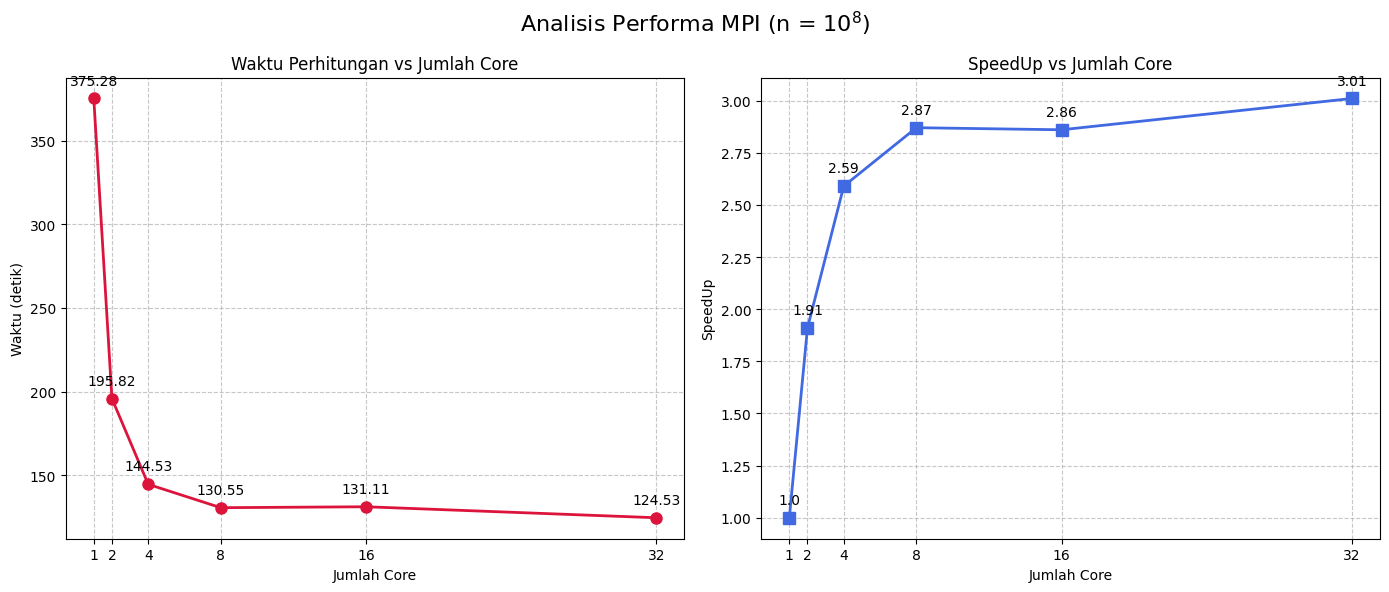

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
cores = np.array([1, 2, 4, 8, 16, 32])
times = np.array([375.28, 195.82, 144.53, 130.55, 131.11, 124.53])
speedup = np.array([1.0, 1.91, 2.59, 2.87, 2.86, 3.01])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle(f'Analisis Performa MPI (n = $10^8$)', fontsize=16)

ax1.plot(cores, times, 'o-', color='crimson', linewidth=2, markersize=8)
ax1.set_title('Waktu Perhitungan vs Jumlah Core', fontsize=12)
ax1.set_xlabel('Jumlah Core', fontsize=10)
ax1.set_ylabel('Waktu (detik)', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(cores)

for x, y in zip(cores, times):
    ax1.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

ax2.plot(cores, speedup, 's-', color='royalblue', linewidth=2, markersize=8, label='Actual Speedup')

ax2.set_title('SpeedUp vs Jumlah Core', fontsize=12)
ax2.set_xlabel('Jumlah Core', fontsize=10)
ax2.set_ylabel('SpeedUp', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(cores)

for x, y in zip(cores, speedup):
    ax2.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# **Kereta**

 #### **1. Konsep Drag Force**

Dalam gas kinetik, udara disusun oleh molekul yang memiliki:
- massa $m$
- kecepatan termal $V_{thermal}$
- distribusi maxwell-boltzmann

Drag force muncul dari transfer momentum antara partikel gas dan permukaan sebuah kendaraan (kereta, mobil, pesawat).
- Saat partikel menumbuk sebuah kendaraan, ia mengubah kecepatannya.
- Perubahan momentum partikel ($\Delta p$) memberikan impuls pada sebuah kendaraan, dimana setiap tumbukan men-transfer momentum:

$$ \Delta p = m(v_{after}-v_{before})$$

Drag force adalah total perubahan perubahan momentum per satuan waktu:
$$ F = \frac{dP}{dt}$$


#### **2. Variabel dan Parameter**
Untuk menyelesaikan hal ini ada beberapa parameter yang harus di set:
- $V_{kendaraan}$ : Kecepatan kendaraan (misal bergerak ke arah +x)
- A : luas jalur kendaraan
- m : massa partikel gas
- n : kerapatan jumlah partikel
- $\delta t$ : langkah waktu simulasi
- $N_{sim}$ : jumlah partikel simulasi

#### **3. Distribusi kecepatan termal**

Partikel gas tidak diam, mereka memiliki kecepatan termal acak yang mengikuti Distribusi Maxwell-Boltzmann. Kita mengenerate kecepatan partikel $(v_x, v_y)$ secara acak menggunakan:

$$ f(v_i) = \sqrt{\frac{m}{2 π k_B T}} exp (\frac{mv^2_i}{2k_BT})$$

Selanjutnya di tinjau partikel yang berada di dalam luas area di depan kereta. Partikel dianggap menumbuk jika posisinya pada langkah waktu berikutnya melintasi permukaan depan kendaraan.

Syarat tumbukan untuk partikel $i$:
- Posisi $y, z$ berada dalam area penampang kendaraan.
- $v_{x,i} > 0$ (dalam kerangka acuan partikel relatif terhadap kendaraan).

Ketika partikel menumbuk bagian depan kendaraan, terjadi pantulan. Diffuse Reflection (Tidak Elastis/Termal), partikel diserap sesaat dan dipancarkan kembali dengan kecepatan acak.

- Momentum Masuk ($p_{in, x}$):
$$p_{in, x} = m v_{x, relative}$$

- Momentum Keluar ($p_{out, x}$)

$$p_{out, x} = m (v_{out} \sin\theta \cos\phi)$$

#### **4. Integrasi Monte Carlo (Penjumlahan Gaya)**

Total gaya adalah jumlah momentum yang ditransfer oleh semua partikel yang menumbuk dibagi interval waktu.

$$F_{drag} \approx \frac{N_{bobot}}{\Delta t} \sum_{i=1}^{N_{hit}} m (v_{in, i} - v_{out, i})$$

### Algoritma Simulasi

1.  **Inisialisasi Geometri & Partikel:**
    * Bentuk kurva hidung pesawat menggunakan persamaan pangkat (power-law).
    * Sebar partikel angin ($N$) dengan massa $m$ dan kecepatan awal $v_x$ konstan.
2.  **Loop Waktu (Time Stepping):**
    * **Update Posisi:** Pindahkan setiap partikel berdasarkan kecepatannya saat ini.
    * **Deteksi Tumbukan:** Cek apakah posisi partikel $(x, y)$ berada di dalam area batas geometri pesawat.
    * **Respon Tumbukan:**
        * Jika partikel menabrak, kurangi kecepatan horizontalnya ($v_{x,baru} < v_{x,lama}$).
        * Pantulkan partikel secara vertikal ($v_y$).
    * **Hitung Gaya Drag:** Hitung total hilangnya momentum horizontal partikel per langkah waktu.
    * **Smoothing:** Ambil rata-rata gaya dari beberapa frame terakhir (moving average) untuk menstabilkan pembacaan data.
    * **Reset:** Jika partikel keluar dari layar, kembalikan ke posisi awal (inlet).

### Rumus Utama

1.  **Kinematika (Update Posisi):**

    $$x_{baru} = x_{lama} + v_x \cdot \Delta t$$

    $$y_{baru} = y_{lama} + v_y \cdot \Delta t$$

2.  **Geometri Hidung Pesawat:**

    $$y = y_{tip} \pm R_{max} \left( \frac{x - x_{tip}}{L} \right)^n$$

    *(Dalam kode: $n = 0.45$ untuk sisi atas dan $0.55$ untuk sisi bawah)*

3.  **Perhitungan Gaya Drag (Impuls & Momentum):**
    Gaya hambat dihitung berdasarkan perubahan momentum ($\Delta p$) per satuan waktu ($\Delta t$) sesuai Hukum Newton II:
    
    $$\Delta v_x = v_{x,lama} - v_{x,baru}$$
    
    $$F_{drag} \approx \frac{\sum (m \cdot \Delta v_x)}{\Delta t}$$

    *Dimana $\sum$ adalah jumlahan untuk semua partikel yang menabrak pada frame tersebut.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from matplotlib.patches import Polygon
from collections import deque

# 1. PARAMETER SIMULASI
num_particles = 600
box_w, box_h = 10, 6
dt = 0.04
steps = 300

# Properti Partikel
particle_mass = 0.02  # kg
v_wind_speed = 8.0    # m/s

# Geometri Pesawat
nose_tip_x = 4.0
nose_tip_y = 3.0
body_start_x = 8.0
max_radius = 1.4

# List untuk menyimpan riwayat drag
drag_history = deque(maxlen=20)

# 2. SETUP BENTUK GEOMETRI
# Membuat titik koordinat kurva hidung
num_points = 60
x_curve = np.linspace(nose_tip_x, body_start_x, num_points)

# Rumus Kurva Aerodinamis: y = y0 ± R * ((x-x0)/L)^0.5
normalized_x = (x_curve - nose_tip_x) / (body_start_x - nose_tip_x)
y_upper_curve = nose_tip_y + max_radius * (normalized_x ** 0.45)
y_lower_curve = nose_tip_y - max_radius * (normalized_x ** 0.55)

# Polygon untuk visualisasi
poly_points = []
for i in range(num_points):
    poly_points.append([x_curve[i], y_upper_curve[i]]) # Sisi Atas
for i in range(num_points-1, -1, -1):
    poly_points.append([x_curve[i], y_lower_curve[i]]) # Sisi Bawah
poly_points = np.array(poly_points)

# 3. SETUP PARTIKEL AWAL
x = np.random.uniform(0, nose_tip_x, num_particles)
y = np.random.uniform(0, box_h, num_particles)
vx = np.random.uniform(v_wind_speed - 1, v_wind_speed + 1, num_particles)
vy = np.random.uniform(-0.2, 0.2, num_particles)

# 4. SETUP VISUALISASI
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, box_w)
ax.set_ylim(0, box_h)
ax.set_xlabel("X (meter)")
ax.set_ylabel("Y (meter)")
ax.set_title("Simulasi Drag Force")
ax.set_facecolor('#f4faff')

# Gambar Pesawat
fuselage = Polygon(poly_points, closed=True, facecolor='white', edgecolor='gray', lw=1, zorder=2)
ax.add_patch(fuselage)
belly_pts = [[nose_tip_x, nose_tip_y]] + [[x, y] for x, y in zip(x_curve, y_lower_curve)] + [[body_start_x, nose_tip_y]]
belly = Polygon(belly_pts, closed=True, facecolor='#003366', zorder=3) # Biru tua
ax.add_patch(belly)
cockpit_pts = [[nose_tip_x+1.2, nose_tip_y+0.7], [nose_tip_x+1.5, nose_tip_y+1.0],
               [nose_tip_x+2.3, nose_tip_y+1.1], [nose_tip_x+2.3, nose_tip_y+0.75]]
cockpit = Polygon(cockpit_pts, facecolor='#222', edgecolor='silver', zorder=4)
ax.add_patch(cockpit)

# Plot Partikel & Teks
particles, = ax.plot([], [], '.', markersize=2, color='deepskyblue', alpha=0.6, zorder=1)
text_drag = ax.text(0.05, 0.9, "", transform=ax.transAxes, fontsize=14, color='darkred', weight='bold',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

# 5. LOOP SIMULASI & HITUNG DRAG
writer = PillowWriter(fps=30)
output_file = "wahahahahaha.gif"

print("Mulai perhitungan Drag Force...")

with writer.saving(fig, output_file, dpi=100):
    for step in range(steps):
        # --- UPDATE POSISI ---
        x += vx * dt
        y += vy * dt

        # --- DETEKSI TUMBUKAN ---
        # Kita cek hanya partikel yang ada di rentang X
        in_x_range = (x > nose_tip_x) & (x < body_start_x)

        # Variable untuk menampung total perubahan momentum frame ini
        frame_momentum_loss_x = 0.0

        if in_x_range.any():
            idx = np.where(in_x_range)[0]

            # Hitung batas Y permukaan pesawat di posisi X partikel
            lx = (x[idx] - nose_tip_x) / (body_start_x - nose_tip_x)
            limit_up = nose_tip_y + max_radius * (lx ** 0.45)
            limit_down = nose_tip_y - max_radius * (lx ** 0.55)

            # Cek siapa yang ada DI DALAM body
            hit_mask = (y[idx] < limit_up) & (y[idx] > limit_down)
            hit_indices = idx[hit_mask]

            if len(hit_indices) > 0:
                # --- FISIKA TUMBUKAN & DRAG ---

                # 1. Simpan Vx lama (sebelum tabrakan)
                vx_old = vx[hit_indices].copy()

                # 2. Proses Pantulan (Defleksi)
                # Partikel kehilangan kecepatan X (Transfer energi ke pesawat = Drag)
                vx[hit_indices] *= 0.6

                # Partikel terlempar ke Y (Atas/Bawah)
                is_upper = y[hit_indices] > nose_tip_y
                vy[hit_indices[is_upper]] += np.random.uniform(1, 3, is_upper.sum()) # Lempar ke atas
                vy[hit_indices[~is_upper]] -= np.random.uniform(1, 3, (~is_upper).sum()) # Lempar ke bawah

                # 3. HITUNG GAYA (F = dp/dt)
                # Drag adalah seberapa besar Vx berkurang dikali massa
                vx_new = vx[hit_indices]
                delta_vx = vx_old - vx_new # Selisih kecepatan (positif)

                total_impulse_x = np.sum(delta_vx * particle_mass)
                frame_drag_force = total_impulse_x / dt
                frame_momentum_loss_x = frame_drag_force

                # 4. KOREKSI POSISI (PENTING)
                # Geser partikel sedikit ke kiri/luar agar tidak terjebak di dalam loop
                x[hit_indices] -= 0.15

        # --- SMOOTHING DATA DRAG ---
        # Karena partikel menabrak secara acak, angkanya akan lompat-lompat.
        # Kita rata-rata kan 20 frame terakhir agar enak dibaca.
        drag_history.append(frame_momentum_loss_x)
        avg_drag = np.mean(drag_history)

        # --- RESET BOUNDARY (WIND TUNNEL) ---
        out = (x > box_w) | (y > box_h) | (y < 0)
        if out.any():
            x[out] = 0
            y[out] = np.random.uniform(0, box_h, out.sum())
            vx[out] = np.random.uniform(7, 9, out.sum())
            vy[out] = np.random.uniform(-0.1, 0.1, out.sum())

        # --- UPDATE VISUAL ---
        particles.set_data(x, y)
        text_drag.set_text(f"DRAG FORCE: {avg_drag:.2f} N")

        writer.grab_frame()

        if step % 50 == 0:
            print(f"Frame {step} | Drag: {avg_drag:.2f} N")

print(f"Selesai! Video tersimpan: {output_file}")
plt.close()

Mulai perhitungan Drag Force...
Frame 0 | Drag: 14.00 N
Frame 50 | Drag: 23.96 N
Frame 100 | Drag: 11.87 N
Frame 150 | Drag: 19.42 N
Frame 200 | Drag: 16.46 N
Frame 250 | Drag: 14.49 N
Selesai! Video tersimpan: wahahahahaha.gif


Dalam simulasi ini, kami menggunakan konsep fisika dimana:

  * **Dunia Nyata:** Udara diam ($v=0$), Kereta bergerak menembus udara dengan kecepatan $V_{kereta}$.
  * **Pada Simulasi:** Kereta diam ($v=0$), Udara (partikel) ditembakkan ke arah kereta dengan kecepatan $V_{angin}$.

Secara matematis, besar kecepatannya adalah **sama**, hanya arahnya yang berlawanan.

$$|V_{angin\_simulasi}| = |V_{kereta\_nyata}|$$

Input kecepatan kereta biasanya dalam **km/jam**, sedangkan fisika simulasi (Newton) menggunakan Satuan Internasional (SI) **meter/detik**.

$$V_{flow} (m/s) = \frac{V_{input} (km/h)}{3.6}$$

Di dunia nyata, angin tidak bergerak seperti balok padat dengan kecepatan yang seragam sempurna. Ada turbulensi dan gerakan termal molekul. Oleh karena itu, kami menggunakan **Distribusi Normal (Gaussian Distribution)**.

Model matematis untuk kecepatan partikel ke-$i$ ($v_i$) adalah:

$$v_i \sim \mathcal{N}(\mu, \sigma)$$

Dimana:

  * $\mu$ (Mean / Rata-rata) = $V_{flow}$ (Kecepatan Kereta).
  * $\sigma$ (Standar Deviasi / Variasi) = $k \cdot V_{flow}$ (dimana $k$ adalah koefisien turbulensi, misal 10%).

**Penjelasan Model Probabilitas ini:**

1.  **`loc=v_flow`**: Rata-rata seluruh partikel bergerak secepat kereta. Ini memastikan **"Semakin cepat kereta, semakin cepat rata-rata partikel angin."**
2.  **`scale=v_flow*0.1`**: Ini mensimulasikan **Turbulensi**.
      * Saat kereta pelan (10 m/s), variasi kecepatan angin hanya $\pm 1$ m/s (angin tenang).
      * Saat kereta sangat cepat (100 m/s), variasi kecepatan angin bisa $\pm 10$ m/s (angin sangat kacau/turbulen).
      * Model ini realistis karena pada kecepatan tinggi, udara menjadi lebih *chaotic* (Bilangan Reynolds tinggi).

Partikel di atur lebih cepat, karena kecepatan partikel ($v$) adalah penyumbang terbesar dalam rumus Gaya Hambat (Drag Force).

Dalam simulasi Monte Carlo ini, gaya dihitung dari perubahan momentum (impuls) saat partikel menumbuk kereta:

$$F \approx \frac{\Delta p}{\Delta t} = \frac{m \cdot \Delta v}{\Delta t}$$

Dimana $\Delta v$ (perubahan kecepatan pantulan) berbanding lurus dengan kecepatan datang ($v_{flow}$).

  * Jika partikel datang dengan kecepatan $v$, dia memantul dengan kecepatan sebanding dengan $v$.
  * Maka perubahan momentum ($\Delta p$) sebanding dengan $v$.
  * Selain itu, semakin cepat partikel, semakin **sering** partikel tersebut menabrak kereta dalam satu detik (frekuensi tumbukan naik sebanding dengan $v$).

Secara analitik (Teori Aerodinamika), gabungan kedua faktor ini (momentum per partikel naik & frekuensi tumbukan naik) menghasilkan hubungan kuadratik:

$$F_{drag} \propto v^2$$

### Algoritma Simulasi

1.  **Inisialisasi Geometri & Partikel:**
    * Bentuk kurva hidung pesawat menggunakan persamaan pangkat (power-law).
    * Sebar partikel angin ($N$) dengan massa $m$ dan kecepatan awal $v_x$ konstan.
2.  **Loop Waktu (Time Stepping):**
    * **Update Posisi:** Pindahkan setiap partikel berdasarkan kecepatannya saat ini.
    * **Deteksi Tumbukan:** Cek apakah posisi partikel $(x, y)$ berada di dalam area batas geometri pesawat.
    * **Respon Tumbukan:**
        * Jika partikel menabrak, kurangi kecepatan horizontalnya ($v_{x,baru} < v_{x,lama}$).
        * Pantulkan partikel secara vertikal ($v_y$).
    * **Hitung Gaya Drag:** Hitung total hilangnya momentum horizontal partikel per langkah waktu.
    * **Smoothing:** Ambil rata-rata gaya dari beberapa frame terakhir (moving average) untuk menstabilkan pembacaan data.
    * **Reset:** Jika partikel keluar dari layar, kembalikan ke posisi awal (inlet).

### Rumus Utama

1.  **Kinematika (Update Posisi):**
    $$x_{baru} = x_{lama} + v_x \cdot \Delta t$$
    $$y_{baru} = y_{lama} + v_y \cdot \Delta t$$

2.  **Geometri Hidung Pesawat:**
    $$y = y_{tip} \pm R_{max} \left( \frac{x - x_{tip}}{L} \right)^n$$
    *(Dalam kode: $n = 0.45$ untuk sisi atas dan $0.55$ untuk sisi bawah)*

3.  **Perhitungan Gaya Drag (Impuls & Momentum):**
    Gaya hambat dihitung berdasarkan perubahan momentum ($\Delta p$) per satuan waktu ($\Delta t$) sesuai Hukum Newton II:

    $$\Delta v_x = v_{x,lama} - v_{x,baru}$$
    $$F_{drag} \approx \frac{\sum (m \cdot \Delta v_x)}{\Delta t}$$

    *Dimana $\sum$ adalah jumlahan untuk semua partikel yang menabrak pada frame tersebut.*

Speed (km/h)    | Avg Drag Force (N)  
----------------------------------------
120             | 451.5335
140             | 621.3686
180             | 984.9436
200             | 1236.0414
250             | 1983.3780
300             | 2772.6370


/tmp/ipython-input-158854618.py:165: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


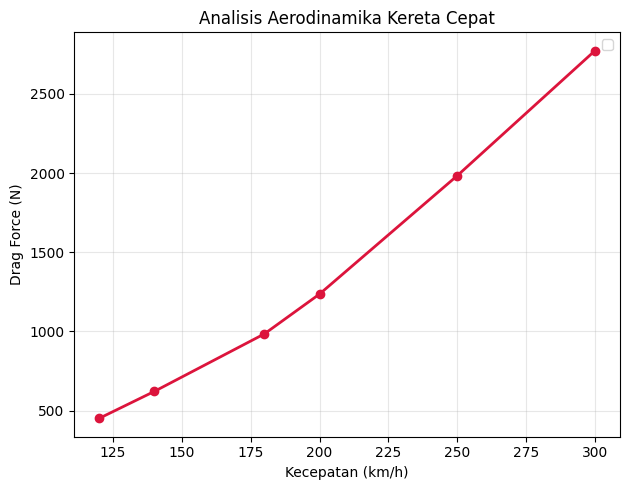

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from collections import deque

# --- 1. CONFIGURATION ---
speeds_kmh = [120, 140, 180, 200, 250, 300]  # Variasi Kecepatan (km/h)
dt = 0.005  # Delta time diperkecil agar partikel tidak "tembus" saat kecepatan tinggi
steps = 500 # Durasi simulasi per kecepatan
particle_mass = 0.02

# Dimensi Ruang Simulasi
box_w, box_h = 15, 6

# --- 2. FUNGSI GEOMETRI KERETA ---
def get_train_geometry():
    # Membuat bentuk moncong kereta cepat (Bullet Train)
    nose_len = 3.0
    body_len = 8.0
    body_height = 1.2

    start_x = 2.0
    nose_tip_x = start_x
    shoulder_x = start_x + nose_len
    end_x = start_x + nose_len + body_len
    mid_y = box_h / 2

    # Titik kurva hidung (Elliptical nose)
    t = np.linspace(0, np.pi/2, 40)
    nose_x = start_x + nose_len * (1 - np.cos(t))
    nose_y_upper = mid_y + body_height * np.sin(t)
    nose_y_lower = mid_y - body_height * np.sin(t) # Simetris untuk 2D sederhana

    # Menyusun Polygon
    upper_deck = [[x, y] for x, y in zip(nose_x, nose_y_upper)]
    upper_deck.append([end_x, mid_y + body_height]) # Atap gerbong

    lower_deck = [[end_x, mid_y - body_height]] # Lantai gerbong
    lower_deck += [[x, y] for x, y in zip(nose_x[::-1], nose_y_lower[::-1])]

    return np.array(upper_deck + lower_deck), start_x, end_x, mid_y, body_height

# Dapatkan geometri sekali saja
poly_points, train_start, train_end, train_cy, train_h = get_train_geometry()

# --- 3. FUNGSI SIMULASI UTAMA ---
def run_simulation(speed_kmh):
    # Konversi km/h ke m/s
    v_flow = speed_kmh / 3.6

    # Setup Partikel
    num_particles = 800 # Partikel lebih banyak untuk akurasi
    x = np.random.uniform(0, box_w, num_particles)
    y = np.random.uniform(0, box_h, num_particles)

    # Angin bergerak ke KIRI (menabrak kereta) dengan kecepatan v_flow
    # Kita tambah sedikit variasi acak (turbulensi)
    vx = np.random.normal(v_flow, v_flow*0.1, num_particles)
    vy = np.random.normal(0, 0.5, num_particles)

    drag_readings = []

    for _ in range(steps):
        # Update posisi (Partikel bergerak ke kanan, kereta diam relatif)
        # Agar visualisasi mudah: Anggap partikel adalah angin yg menabrak
        x += vx * dt
        y += vy * dt

        # --- DETEKSI TUMBUKAN ---
        # Filter kasar (Bounding Box)
        in_range = (x > train_start) & (x < train_end) & \
                   (y > train_cy - train_h - 0.5) & (y < train_cy + train_h + 0.5)

        frame_drag = 0.0

        if in_range.any():
            idx = np.where(in_range)[0]

            # Cek detail geometri (apakah masuk dalam polygon?)
            # Untuk simplifikasi performa tinggi: Kita pakai pendekatan analitik kurva hidung
            # Area hidung ada di x < train_start + 3.0
            nose_region = x[idx] < (train_start + 3.0)

            if nose_region.any():
                # Sub-index untuk partikel yang benar-benar di area hidung
                idx_nose = idx[nose_region]

                # Hitung batas Y kurva hidung di posisi X partikel
                # Persamaan elips: y = cy +/- h * sqrt(1 - ((x-x0-L)/L)^2) ... modifikasi
                # Kita pakai simplifikasi jarak radial untuk kecepatan
                local_x = x[idx_nose] - train_start
                # Normalisasi 0..1 sepanjang hidung
                ratio = local_x / 3.0
                # Approx radius y di titik x
                local_h = train_h * np.sqrt(1 - (1-ratio)**2) if ratio.all() <= 1 else train_h

                # Cek impact
                impact = (y[idx_nose] < train_cy + local_h) & (y[idx_nose] > train_cy - local_h)

                if impact.any():
                    hit_id = idx_nose[impact]

                    # --- HITUNG DRAG ---
                    # F = m * (dv/dt)
                    vx_old = vx[hit_id].copy()

                    # Pantulan inelastis sebagian (aerodinamis menyerap/membelokkan)
                    vx[hit_id] *= 0.2 # Kecepatan horizontal hilang drastis saat tabrakan

                    # Defleksi vertikal acak (simulasi aliran udara ke atas/bawah)
                    deflect = np.random.choice([-1, 1], size=len(hit_id)) * v_flow * 0.5
                    vy[hit_id] += deflect

                    # Momentum yang hilang = Gaya Drag pada kereta
                    d_vx = vx_old - vx[hit_id]
                    total_impulse = np.sum(d_vx * particle_mass)
                    frame_drag = total_impulse / dt

                    # Reset posisi partikel yg menabrak agar tidak stuck
                    x[hit_id] = 0 # Balikin ke depan
                    y[hit_id] = np.random.uniform(0, box_h, len(hit_id))

        # Boundary Reset (Wind Tunnel Loop)
        out_bound = (x > box_w) | (y < 0) | (y > box_h)
        if out_bound.any():
            x[out_bound] = 0
            y[out_bound] = np.random.uniform(0, box_h, out_bound.sum())
            vx[out_bound] = np.random.normal(v_flow, v_flow*0.1, out_bound.sum())
            vy[out_bound] = np.random.normal(0, 0.5, out_bound.sum())

        # Ambil data setelah simulasi stabil (setelah step 100)
        if _ > 100:
            drag_readings.append(frame_drag)

    return np.mean(drag_readings)

# --- 4. EKSEKUSI LOOP ANALISIS ---
results_drag = []

print(f"{'Speed (km/h)':<15} | {'Avg Drag Force (N)':<20}")
print("-" * 40)

for v in speeds_kmh:
    d = run_simulation(v)
    results_drag.append(d)
    print(f"{v:<15} | {d:.4f}")

# --- 5. PLOTTING HASIL ---
plt.figure(figsize=(12, 5))

# Plot 1: Grafik Drag vs Speed
plt.subplot(1, 2, 1)
plt.plot(speeds_kmh, results_drag, 'o-', color='crimson', linewidth=2)

# Fitting Kurva Kuadratik (Teori Aerodinamika: Drag ~ v^2)
z = np.polyfit(speeds_kmh, results_drag, 2)
p = np.poly1d(z)
x_fit = np.linspace(min(speeds_kmh), max(speeds_kmh), 100)
#plt.plot(x_fit, p(x_fit), 'b--', alpha=0.6, label=f'Teori Fisika ($v^2$)')

plt.title("Analisis Aerodinamika Kereta Cepat")
plt.xlabel("Kecepatan (km/h)")
plt.ylabel("Drag Force (N)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# **Paralel**

Hasil running menggunakan mpi4py-openmpi

| Jumlah Core  |  n | Waktu Perhitungan (detik) | SpeedUp|
|----------- |---------|---------------|------------------------|
|Serial|$10^8$ |**66.62**|**1** |
|2     |$10^8$ |**59.20**|**1.12** |
|4     |$10^8$ |**47.55**|**1.40** |
|8     |$10^8$ |**41.40**|**1.60** |
|16    |$10^8$ |**41.69**|**1.59** |
|32    |$10^8$ |**39.25**|**1.69** |

In [ ]:
from mpi4py import MPI
import numpy as np
import time

# ==========================================
# 1. SETUP MPI
# ==========================================
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# ==========================================
# 2. PARAMETER EKSTREM
# ==========================================
TOTAL_PARTICLES = 10**8      # 100 Juta Partikel (10^8)
INPUT_SPEED_KMH = 300.0      # Kecepatan Kereta
STEPS = 100                  # Jumlah Frame Simulasi
DT = 0.005                   # Delta time kecil untuk presisi tinggi

# Konversi Kecepatan
V_FLOW = INPUT_SPEED_KMH / 3.6  # m/s (approx 83.33 m/s)

# Dimensi Box Simulasi
BOX_W, BOX_H = 20.0, 8.0

# Geometri Kereta (Bullet Train Profile)
NOSE_LEN = 4.0
BODY_LEN = 10.0
TRAIN_H = 1.5
TRAIN_START_X = 2.0
TRAIN_CY = BOX_H / 2

# Fisika Udara
# Agar angka drag realistis (Newton), kita kalibrasi massa total partikel
# dengan massa udara di volume box (rho * Volume).
# Densitas udara ~ 1.2 kg/m^3. Asumsi tebal 2D = 1m.
AIR_DENSITY = 1.2
TOTAL_AIR_MASS = AIR_DENSITY * (BOX_W * BOX_H)
PARTICLE_MASS = TOTAL_AIR_MASS / TOTAL_PARTICLES

# ==========================================
# 3. INISIALISASI LOKAL (PARTITIONING)
# ==========================================
# Bagi 100 juta partikel ke masing-masing core
local_n = TOTAL_PARTICLES // size
# Handle sisa pembagian
if rank == size - 1:
    local_n += TOTAL_PARTICLES % size

# SEED RANDOM UNIK PER CORE (Sangat Penting!)
np.random.seed(rank * 777 + int(time.time()))

if rank == 0:
    print("="*60)
    print(f"HIGH PERFORMANCE COMPUTATION: BULLET TRAIN DRAG ANALYSIS")
    print(f"Target Speed    : {INPUT_SPEED_KMH} km/h ({V_FLOW:.2f} m/s)")
    print(f"Total Particles : {TOTAL_PARTICLES:,} (10^8)")
    print(f"Total Cores     : {size}")
    print(f"Load per Core   : ~{local_n:,} particles")
    print("="*60)
    print("Initializing Arrays... (This may take RAM)", flush=True)

# Generate Partikel Lokal
# Partikel angin bergerak ke KIRI (menabrak kereta)
x = np.random.uniform(0, BOX_W, local_n)
y = np.random.uniform(0, BOX_H, local_n)
vx = np.random.normal(-V_FLOW, V_FLOW*0.1, local_n) # Minus karena ke kiri
vy = np.random.normal(0, 1.0, local_n)

local_drag_history = []

# ==========================================
# 4. LOOP SIMULASI PARALEL
# ==========================================
comm.Barrier() # Tunggu semua siap
start_time = MPI.Wtime()

for step in range(STEPS):
    # --- A. UPDATE POSISI ---
    x += vx * DT
    y += vy * DT

    # --- B. DETEKSI TUMBUKAN (OPTIMIZED) ---
    # 1. Filter Bounding Box (Cepat)
    # Area sekitar kereta
    in_bbox = (x > TRAIN_START_X) & (x < TRAIN_START_X + NOSE_LEN + BODY_LEN) & \
              (y > TRAIN_CY - TRAIN_H - 0.5) & (y < TRAIN_CY + TRAIN_H + 0.5)

    step_impulse = 0.0

    if np.any(in_bbox):
        idx = np.where(in_bbox)[0]

        # 2. Cek Geometri Hidung (Elliptical Nose)
        # x lokal relatif terhadap ujung hidung
        local_x = x[idx] - TRAIN_START_X

        # Cek apakah partikel ada di area hidung (0 < x < NOSE_LEN)
        mask_nose = (local_x > 0) & (local_x < NOSE_LEN)

        if np.any(mask_nose):
            idx_nose = idx[mask_nose]
            lx = local_x[mask_nose]

            # Hitung tinggi permukaan hidung di titik x tersebut
            # Profil: y = H * sqrt(x/L) -> Profil parabolik tajam untuk kereta cepat
            # Atau Ellipse: y = H * sqrt(1 - ((x-L)/L)^2) -> Hidung bulat

            # Kita pakai profil power law (aerodinamis)
            ratio = lx / NOSE_LEN
            surface_h = TRAIN_H * (ratio ** 0.5)

            # Cek apakah Y partikel ada di dalam body kereta
            impact = (y[idx_nose] < TRAIN_CY + surface_h) & (y[idx_nose] > TRAIN_CY - surface_h)

            if np.any(impact):
                hit_id = idx_nose[impact]

                # --- HITUNG TRANSFER MOMENTUM ---
                vx_old = vx[hit_id].copy()

                # Partikel kehilangan kecepatan horizontal (Drag)
                vx[hit_id] *= 0.1 # Sisa sedikit setelah nabrak

                # Defleksi vertikal (Slipstream)
                vy[hit_id] += np.random.normal(0, V_FLOW*0.2, len(hit_id))

                # Hitung Impuls (Force * dt)
                # Karena angin ke kiri (-), force drag ke kiri (-)
                # Tapi Drag Force pada kereta adalah reaksi (+/ke kanan)
                d_vx = vx[hit_id] - vx_old # Positif (karena -10 jadi -1)

                # F = m * a = m * dv/dt
                # Total force di frame ini
                impulse = np.sum(d_vx * PARTICLE_MASS)
                step_impulse += np.abs(impulse) # Ambil magnitude

                # Teleport partikel yang nabrak agar tidak stuck (Reset)
                x[hit_id] = BOX_W # Balik ke belakang antrian
                y[hit_id] = np.random.uniform(0, BOX_H, len(hit_id))
                vx[hit_id] = np.random.normal(-V_FLOW, V_FLOW*0.1, len(hit_id))

    # --- C. WIND TUNNEL LOOP ---
    out_left = x < 0
    if np.any(out_left):
        x[out_left] = BOX_W
        y[out_left] = np.random.uniform(0, BOX_H, np.sum(out_left))
        # Reset kecepatan penuh
        vx[out_left] = np.random.normal(-V_FLOW, V_FLOW*0.1, np.sum(out_left))

    # --- D. MPI REDUCTION ---
    # Hitung Drag Force (Impuls / dt)
    local_drag = step_impulse / DT

    # Gabungkan hasil dari semua core
    global_drag = comm.reduce(local_drag, op=MPI.SUM, root=0)

    if rank == 0:
        local_drag_history.append(global_drag)
        if step % 10 == 0:
            print(f"Step {step:03d}/{STEPS} | Current Drag: {global_drag:.2f} N")

# ==========================================
# 5. HASIL AKHIR
# ==========================================
end_time = MPI.Wtime()

if rank == 0:
    elapsed = end_time - start_time
    avg_drag = np.mean(local_drag_history[-20:]) # Rata-rata stabil

    print("="*60)
    print(f"SIMULATION COMPLETE")
    print(f"Time Elapsed    : {elapsed:.2f} seconds")
    print(f"Calculated Drag : {avg_drag:.2f} Newton")
    print(f"Speed           : {INPUT_SPEED_KMH} km/h")
    print("="*60)

    # # Simpan hasil ke gambar simpel
    # import matplotlib.pyplot as plt
    # plt.figure(figsize=(10, 6))
    # plt.plot(local_drag_history, label='Instant Drag')
    # plt.axhline(avg_drag, color='r', linestyle='--', label=f'Avg: {avg_drag:.0f} N')
    # plt.title(f"High-Speed Train Drag Analysis (v={INPUT_SPEED_KMH} km/h, n=$10^8$)")
    # plt.xlabel("Simulation Steps")
    # plt.ylabel("Aerodynamic Drag Force (N)")
    # plt.legend()
    # plt.grid(True)
    # plt.savefig(f"drag_result_{int(INPUT_SPEED_KMH)}kmh.png")
    # print(f"Graph saved: drag_result_{int(INPUT_SPEED_KMH)}kmh.png")

MPI.Finalize()

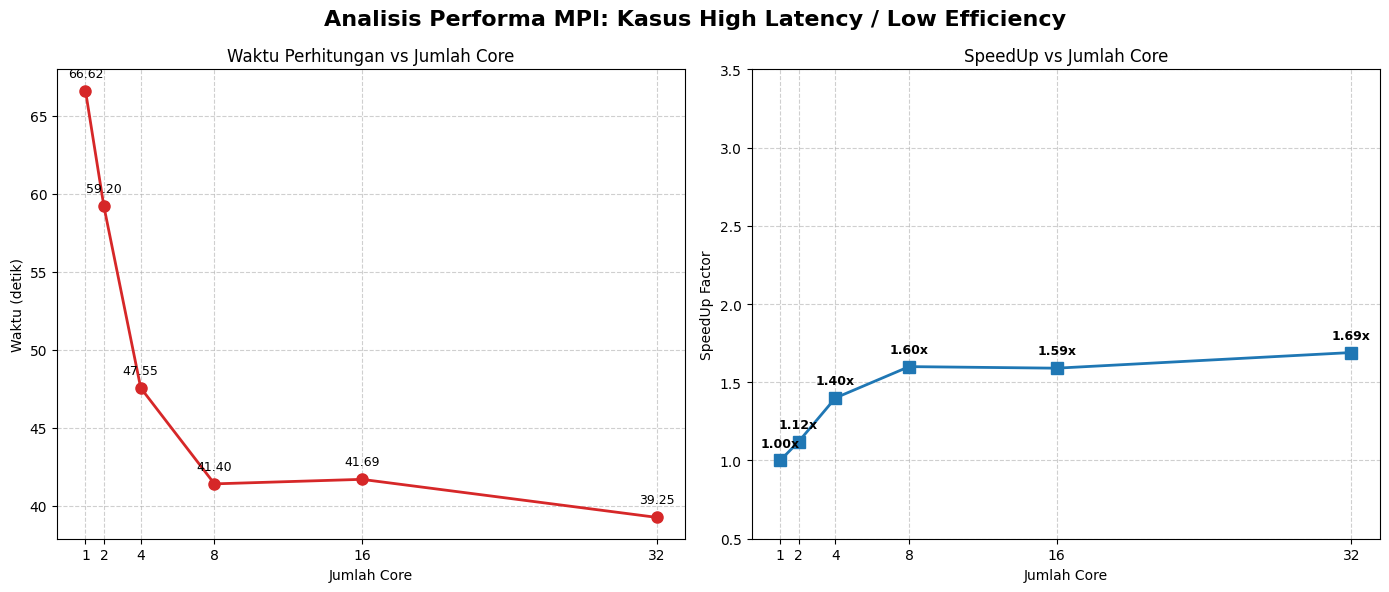

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DATA INPUT (Dari Gambar Kedua) ---
cores = np.array([1, 2, 4, 8, 16, 32])
times = np.array([66.62, 59.20, 47.55, 41.40, 41.69, 39.25])
speedup = np.array([1.00, 1.12, 1.40, 1.60, 1.59, 1.69])

# --- 2. SETUP SUBPLOTS (1 Baris, 2 Kolom) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Judul Utama
plt.suptitle('Analisis Performa MPI: Kasus High Latency / Low Efficiency', fontsize=16, fontweight='bold')

# --- GRAFIK KIRI: WAKTU KOMPUTASI ---
ax1.plot(cores, times, 'o-', color='#d62728', linewidth=2, markersize=8) # Merah
ax1.set_title('Waktu Perhitungan vs Jumlah Core', fontsize=12)
ax1.set_xlabel('Jumlah Core', fontsize=10)
ax1.set_ylabel('Waktu (detik)', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xticks(cores)

# Anotasi Angka Waktu
for x, y in zip(cores, times):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# --- GRAFIK KANAN: SPEEDUP ---
ax2.plot(cores, speedup, 's-', color='#1f77b4', linewidth=2, markersize=8, label='Actual Speedup') # Biru
# Garis Ideal (Opsional untuk perbandingan)
#ax2.plot([1, 32], [1, 32], 'k--', alpha=0.2, label='Ideal Linear')

ax2.set_title('SpeedUp vs Jumlah Core', fontsize=12)
ax2.set_xlabel('Jumlah Core', fontsize=10)
ax2.set_ylabel('SpeedUp Factor', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xticks(cores)
ax2.set_ylim(0.5, 3.5) # Mengatur batas Y agar grafik tidak terlalu gepeng di bawah

# Anotasi Angka SpeedUp
for x, y in zip(cores, speedup):
    ax2.annotate(f'{y:.2f}x', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Revisi Kereta Drag Force

In [ ]:
from mpi4py import MPI
import numpy as np
import time

# ==========================================
# 1. SETUP MPI
# ==========================================
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# ==========================================
# 2. PARAMETER EKSTREM
# ==========================================
TOTAL_PARTICLES = 10**8      # 100 Juta Partikel (10^8)
INPUT_SPEED_KMH = 300.0      # Kecepatan Kereta
STEPS = 100                  # Jumlah Frame Simulasi
DT = 0.005                   # Delta time

# Konversi Kecepatan
V_FLOW = INPUT_SPEED_KMH / 3.6  # m/s

# Dimensi Box Simulasi
BOX_W, BOX_H = 20.0, 8.0

# Geometri Kereta
NOSE_LEN = 4.0
BODY_LEN = 10.0
TRAIN_H = 1.5
TRAIN_START_X = 2.0
TRAIN_CY = BOX_H / 2

# Fisika Udara
AIR_DENSITY = 1.2
TOTAL_AIR_MASS = AIR_DENSITY * (BOX_W * BOX_H)
PARTICLE_MASS = TOTAL_AIR_MASS / TOTAL_PARTICLES

# ==========================================
# 3. INISIALISASI LOKAL (PARTITIONING)
# ==========================================
local_n = TOTAL_PARTICLES // size
if rank == size - 1:
    local_n += TOTAL_PARTICLES % size

# SEED RANDOM UNIK PER CORE
np.random.seed(rank * 777 + int(time.time()))

if rank == 0:
    print("="*60)
    print(f"HIGH PERFORMANCE COMPUTATION: BULLET TRAIN DRAG ANALYSIS")
    print(f"Total Particles : {TOTAL_PARTICLES:,}")
    print(f"Total Cores     : {size}")
    print(f"Load per Core   : ~{local_n:,} particles")
    print("="*60)
    print("Initializing Arrays... (This may take RAM)", flush=True)

# Generate Partikel Lokal
x = np.random.uniform(0, BOX_W, local_n)
y = np.random.uniform(0, BOX_H, local_n)
vx = np.random.normal(-V_FLOW, V_FLOW*0.1, local_n)
vy = np.random.normal(0, 1.0, local_n)

local_drag_history = []

# ==========================================
# 4. LOOP SIMULASI PARALEL
# ==========================================
comm.Barrier()
start_time = MPI.Wtime() # Mulai timer bersamaan

for step in range(STEPS):
    # --- A. UPDATE POSISI ---
    x += vx * DT
    y += vy * DT

    # --- B. DETEKSI TUMBUKAN ---
    in_bbox = (x > TRAIN_START_X) & (x < TRAIN_START_X + NOSE_LEN + BODY_LEN) & \
              (y > TRAIN_CY - TRAIN_H - 0.5) & (y < TRAIN_CY + TRAIN_H + 0.5)

    step_impulse = 0.0

    if np.any(in_bbox):
        idx = np.where(in_bbox)[0]
        local_x = x[idx] - TRAIN_START_X
        mask_nose = (local_x > 0) & (local_x < NOSE_LEN)

        if np.any(mask_nose):
            idx_nose = idx[mask_nose]
            lx = local_x[mask_nose]

            ratio = lx / NOSE_LEN
            surface_h = TRAIN_H * (ratio ** 0.5)

            impact = (y[idx_nose] < TRAIN_CY + surface_h) & (y[idx_nose] > TRAIN_CY - surface_h)

            if np.any(impact):
                hit_id = idx_nose[impact]
                vx_old = vx[hit_id].copy()
                vx[hit_id] *= 0.1
                vy[hit_id] += np.random.normal(0, V_FLOW*0.2, len(hit_id))

                d_vx = vx[hit_id] - vx_old
                impulse = np.sum(d_vx * PARTICLE_MASS)
                step_impulse += np.abs(impulse)

                x[hit_id] = BOX_W
                y[hit_id] = np.random.uniform(0, BOX_H, len(hit_id))
                vx[hit_id] = np.random.normal(-V_FLOW, V_FLOW*0.1, len(hit_id))

    # --- C. WIND TUNNEL LOOP ---
    out_left = x < 0
    if np.any(out_left):
        x[out_left] = BOX_W
        y[out_left] = np.random.uniform(0, BOX_H, np.sum(out_left))
        vx[out_left] = np.random.normal(-V_FLOW, V_FLOW*0.1, np.sum(out_left))

    # --- D. MPI REDUCTION ---
    local_drag = step_impulse / DT
    global_drag = comm.reduce(local_drag, op=MPI.SUM, root=0)

    if rank == 0:
        local_drag_history.append(global_drag)
        if step % 10 == 0:
            print(f"Step {step:03d}/{STEPS} | Current Drag: {global_drag:.2f} N")

# ==========================================
# 5. HASIL AKHIR & TIMING PER CORE
# ==========================================
comm.Barrier() # Pastikan semua selesai sebelum catat waktu
end_time = MPI.Wtime()

# 1. Hitung waktu lokal di setiap core
local_elapsed = end_time - start_time

# 2. Kumpulkan semua waktu ke Rank 0 (Gather)
# all_times akan menjadi list [time_core0, time_core1, time_core2, ...] di Rank 0
# Di Rank lain, all_times bernilai None
all_times = comm.gather(local_elapsed, root=0)

if rank == 0:
    elapsed_total = end_time - start_time
    avg_drag = np.mean(local_drag_history[-20:])

    print("\n" + "="*60)
    print("COMPUTATION PERFORMANCE REPORT")
    print("="*60)

    # Loop untuk print waktu setiap core
    print(f"{'Rank ID':<10} | {'Time (seconds)':<15} | {'Status'}")
    print("-" * 45)
    for i, t in enumerate(all_times):
        print(f"Core {i:<5} | {t:.4f} s        | {'OK'}")

    print("-" * 45)
    # Analisis Load Balancing
    max_t = max(all_times)
    min_t = min(all_times)
    avg_t = sum(all_times) / len(all_times)
    imbalance = (max_t - min_t) / max_t * 100

    print(f"Fastest Core : {min_t:.4f} s")
    print(f"Slowest Core : {max_t:.4f} s")
    print(f"Avg Time     : {avg_t:.4f} s")
    print(f"Load Imbalanc: {imbalance:.2f}% (Lower is better)")

    print("="*60)
    print(f"SIMULATION PHYSICS RESULT")
    print(f"Calculated Drag : {avg_drag:.2f} Newton")
    print(f"Speed           : {INPUT_SPEED_KMH} km/h")
    print("="*60)

MPI.Finalize()